<a href="https://colab.research.google.com/github/jayanta17/fsm/blob/main/FakeNewsDetectionUsingLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Done By:**<br>
B.Sahithi Reddy(M.Sc-DA)<br>
A.Umashankar Rao(M.Sc-DA)<br>
Jayanta Kumar Pal(M.Sc-DA)<br>

## **Fake News Detection Using LSTM Neural Networks**



## **Recurrent Neural Networks(RNN)**
Recurrent Neural Network(RNN) are a type of Neural networks where the output from previous step are fed as input to the current step.The most important feature of RNN is Hidden state, which remembers some information about a sequence.RNN have a “memory” which remembers all information about what has been calculated. It uses the same parameters for each input as it performs the same task on all the inputs or hidden layers to produce the output. 

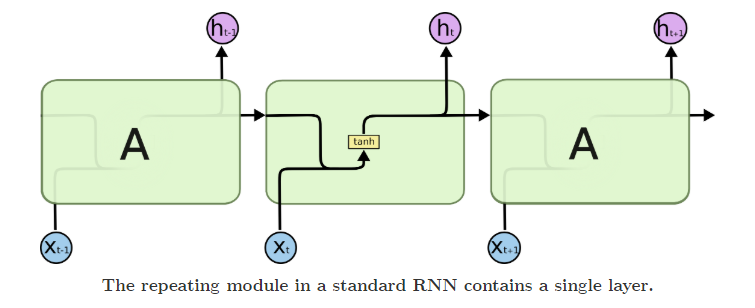

## **LSTM**
LSTM networks are a type of RNN that uses special units in addition to standard units. LSTM units include a 'memory cell' that can maintain information in memory for long periods of time. A set of gates is used to control when information enters the memory, when it's output, and when it's forgotten.


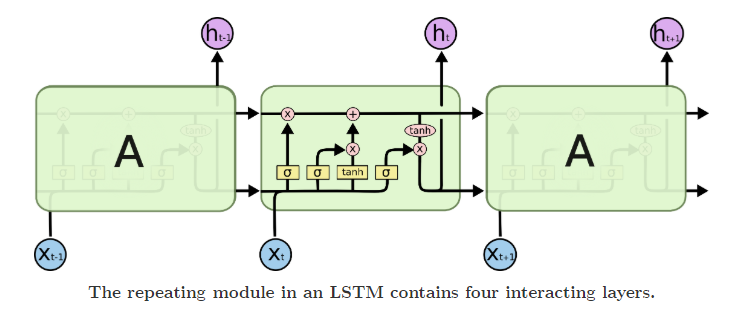

## **Applications of RNN<br>**

> **Time Series Prediction<br>**
**Speech Recognition<br>**
**Rhythm Learning<br>**
**Music Composition<br>**
**Grammar Learning<br>**
**Handwriting Recognition<br>**
**Video Tagging<br>**
**End to End Translation**




**Mounting Google Drive**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


''' Load the training dataset '''

df = pd.read_csv('/content/drive/My Drive/train.csv')               

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Displaying the first 5 records**

In [ ]:
df.head()                                                         

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## **Data Preprocessing and Cleaning**

In [ ]:
''' Dropping the NAN values '''
df = df.dropna()

In [ ]:
''' Separating the dependent and independent features '''

#Getting the independent features
X = df.drop('label',axis = 1) 

#Getting the independent features                                                 
y = df['label']                                                                

In [ ]:
''' Knowing the shape of X and y '''

print(X.shape)
print(y.shape)

(18285, 4)
(18285,)


**IMPORTING LIBRARIES**

In [ ]:
#to store the data as a dataframe 
import pandas as pd
#for a real-valued vector representation                                               
from tensorflow.keras.layers import Embedding   
#to make the samples of  same size
from tensorflow.keras.preprocessing.sequence import pad_sequences
#for stack of layers to the model
from tensorflow.keras.models import Sequential
#to map words to a word-vector                     
from tensorflow.keras.preprocessing.text import one_hot  
#to process the sequences of data
from tensorflow.keras.layers import LSTM                           
 #receives input from its previous layer
from tensorflow.keras.layers import Dense                         
#for training of deep neural networks
import tensorflow as tf     
#for mathematical calculations
import numpy as np             

### **STEMMING**
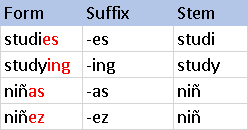

### **Stemming is the process of removing the suffix from a word and reduce it to its root word. The resultant word may not be a meaningful word always.**

In [ ]:
#nlp library
import nltk
#regular expressions
import re
#importing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#storing the independent features
messages = X.copy()
#since NaN values were dropped
messages.reset_index(inplace = True)

###**Splitting and Adding the stemmed words except stopwords**

### Here initially we are importing the library to do stemming.Then we are defining the object for stemming class. We run a loop till the range of all sentences and only select those words having characters a-zA-Z divided by spaces.After lowering the sentences and splitting them to get words,we performed stemming on them to get only the required works and stored them in corpus

In [ ]:
#library imported
from nltk.stem.porter import PorterStemmer  
#built-in function for stemming                                                           
ps = PorterStemmer()  
#to create a list for embedding                                                                                    
corpus = []                                                                                              
for i in range(len(messages)): 
  #to create a sentence only with lower and upper case words                                                                          
  review = re.sub('[^a-zA-Z]', ' ',messages['title'][i])                                                  
  review = review.lower().split()
   #excluding the stop words
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]                  
  review = ' '.join(review)
   #words appended for a list of embedding
  corpus.append(review) 
#to display first 10lines
corpus[0:10]                                                                                 

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

## **One hot encoding for embedding layers**
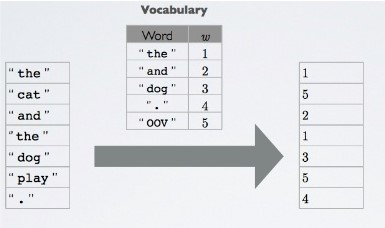

## Here we are finding the one hot representation for every word in the sentences.This means that we are finding the index of each word in those sentences with respect to the vocabulary size

In [ ]:
#Setting up vocabulary size
vocab=5000                                                                                
onehot_repr=[one_hot(words,vocab)for words in corpus] 
#to display first 10 lines
onehot_repr[0:10]

[[3226, 1802, 2248, 1049, 2377, 2307, 221, 1433, 2460, 331],
 [729, 2648, 3118, 2089, 4439, 4227, 4465],
 [46, 323, 4461, 958],
 [1018, 1563, 94, 428, 868, 4276],
 [4161, 4439, 858, 1452, 4861, 3437, 4439, 1282, 3591, 2528],
 [1975,
  2273,
  4119,
  626,
  3009,
  4529,
  3301,
  447,
  2204,
  4075,
  3201,
  4380,
  3720,
  4146,
  4465],
 [2803, 2187, 3619, 1443, 1449, 2412, 3199, 799, 4242, 3064, 2446],
 [4774, 1899, 2211, 4961, 3614, 2256, 4529, 264, 4242, 3064, 2446],
 [3162, 2577, 802, 3650, 4321, 1464, 3514, 3965, 4529, 3317],
 [2314, 553, 4966, 4944, 4468, 4905, 2989, 519]]

### **Padding sequences**

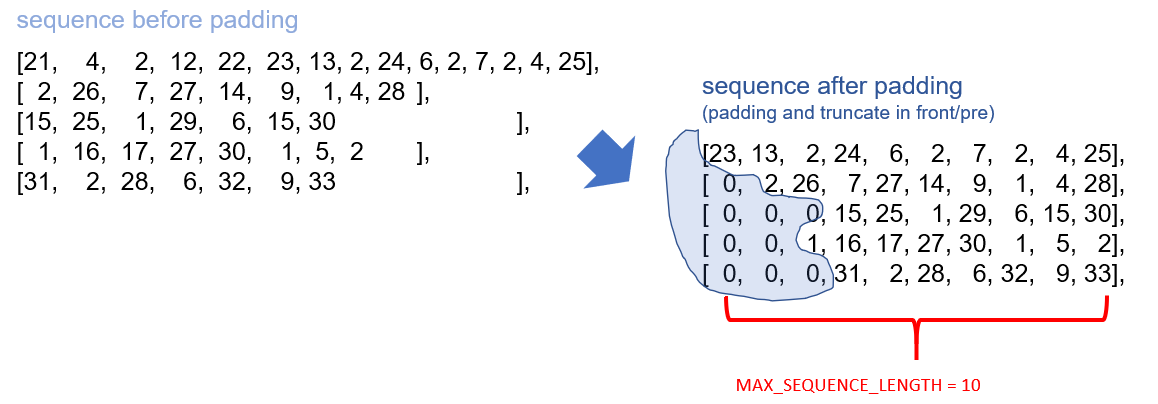

### Before actually giving these sentences to the embedding layer, we have to make these sentences of fixed length. This is where "padding" becomes necessary.Here we are setting the sentence length as 30 and performing padding onto these one-hot representations of sentences using pad_sequences(). We are using padding as "pre", which means it will add 0's before the sentences, to make them of equal length.

In [ ]:
#Setting sentence length
length = 30 
#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=length)                      

In [ ]:
#to display first 5 lines
embedded_docs[0:5]                                                                           

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0, 3226, 1802,
        2248, 1049, 2377, 2307,  221, 1433, 2460,  331],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  729, 2648, 3118, 2089, 4439, 4227, 4465],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   46,  323, 4461,  958],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 1018, 1563,   94,  428,  868, 4276],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0, 4161, 4439,
         858, 1452, 4861, 3437, 

### **Building the model**

In [ ]:
#Creating the lstm model
embedding_vector_features=40   
#to add stack of layers
model=Sequential()
#layer2
#embedding layer with vocab,feature vectores and sentence length
model.add(Embedding(vocab,embedding_vector_features,input_length=length))
#layer3
#Adding 100 lstm neurons in the layer
model.add(LSTM(100)) 
#layer4
#Dense layer to classify the news with activation function
model.add(Dense(1,activation='sigmoid'))
#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])   

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


## **Fitting the LSTM model**

In [ ]:
# Converting the X and y as array which are embedded padded objects
X_final=np.array(embedded_docs)                                                   
y_final=np.array(y)  
#Check shape of X and y final
X_final.shape,y_final.shape

((18285, 30), (18285,))

**Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)  

**Training the model with 10 epochs and 64 batch size**

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 10s 41ms/step - loss: 0.4916 - accuracy: 0.7436 - val_loss: 0.1955 - val_accuracy: 0.9186
Epoch 2/10
192/192 [==============================] - 7s 38ms/step - loss: 0.1392 - accuracy: 0.9475 - val_loss: 0.1963 - val_accuracy: 0.9193
Epoch 3/10
192/192 [==============================] - 7s 37ms/step - loss: 0.0876 - accuracy: 0.9690 - val_loss: 0.2273 - val_accuracy: 0.9183
Epoch 4/10
192/192 [==============================] - 7s 37ms/step - loss: 0.0594 - accuracy: 0.9813 - val_loss: 0.2543 - val_accuracy: 0.9145
Epoch 5/10
192/192 [==============================] - 7s 38ms/step - loss: 0.0399 - accuracy: 0.9869 - val_loss: 0.3038 - val_accuracy: 0.9132
Epoch 6/10
192/192 [==============================] - 7s 38ms/step - loss: 0.0260 - accuracy: 0.9924 - val_loss: 0.3510 - val_accuracy: 0.9084
Epoch 7/10
192/192 [==============================] - 7s 38ms/step - loss: 0.0152 - accuracy: 0.9964 - val_loss: 0.3929 - val_accuracy: 0.898

### **Evaluation of the model**

### **Confusion Matrix for predicted values**

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(0.5, 1.0, 'CONFUSION MATRIX')

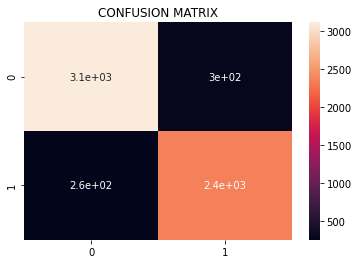

In [ ]:
 # Predicting from test data
y_pred=model.predict_classes(X_test)                                                            
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,y_pred)
ax = plt.axes()
#Creating confusion matrix
sns.heatmap(cm,annot = True,ax = ax)
ax.set_title('CONFUSION MATRIX')                                                               

**Accuracy score of the model**

In [ ]:
 #Checking for accuracy
from sklearn.metrics import accuracy_score                                                    
accuracy_score(y_test,y_pred)     

0.907870753935377

**A dataframe with actual values and values predicted by model**

In [ ]:
#array to list
list1=y_test.tolist()                                                                           
list2=y_pred.tolist() 
#list to dictionary
d={"Actual values":list1,"Predicted values":list2}    
#dictionary to dataframe                                                            
df1=pd.DataFrame(d)  
print(df1)

      Actual values Predicted values
0                 1              [1]
1                 0              [0]
2                 0              [0]
3                 0              [0]
4                 1              [1]
...             ...              ...
6030              0              [0]
6031              0              [0]
6032              0              [0]
6033              1              [1]
6034              1              [1]

[6035 rows x 2 columns]
